Taller 3
\
Thomas Jara
\
Santiago Lizarazo

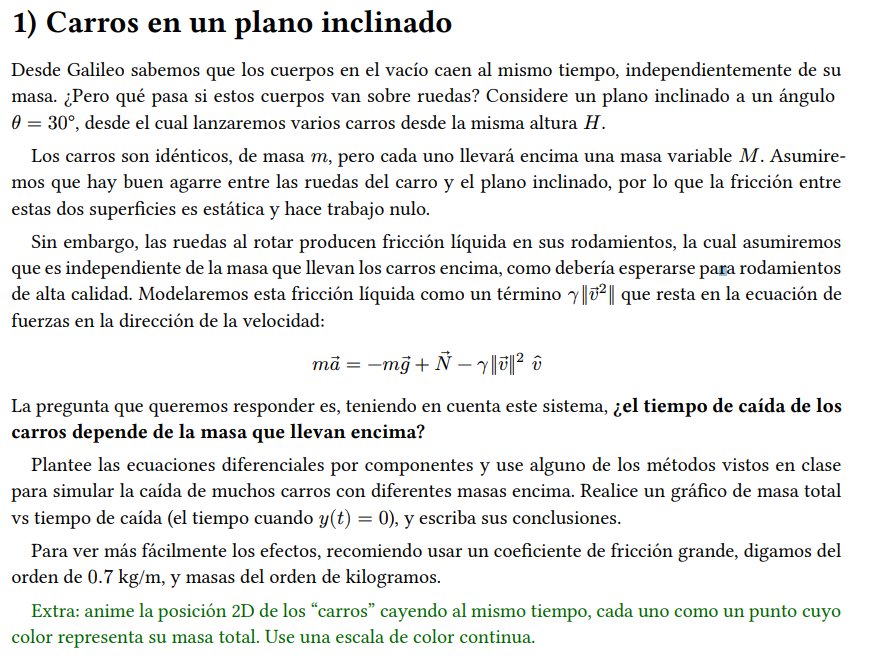

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

In [17]:
#constantes
angulo=30
masas=[1,2,3,4,5,6,7,8,9,10,20,30]
g=9.8
gamma=0.7
H=10
tiempos=[]

Creando el modelo

In [18]:
for i in masas:
    m=i
    def system (y,S,g=g,gamma=gamma,m=m):
        y,v = S
        return [v,(np.cos(np.degrees(30))-1)*g-(gamma/m)*v**2]
    y_0=H
    v_0=0
    S_0=(y_0,v_0)
    t=np.linspace(0,5,1000)
    sol=solve_ivp(system,t_span=(0,max(t)),y0=S_0,t_eval=t)
    soluciones=sol.y
    soluciones_antes_de_caer=np.where(soluciones>0)[1]
    tiempos.append(sol.t[soluciones_antes_de_caer[-1]])
tiempos
   


[0.43043043043043044,
 0.6006006006006006,
 0.7007007007007007,
 0.7707707707707707,
 0.8158158158158159,
 0.8458458458458459,
 0.8708708708708709,
 0.8858858858858859,
 0.9009009009009009,
 0.9159159159159159,
 0.970970970970971,
 0.990990990990991]

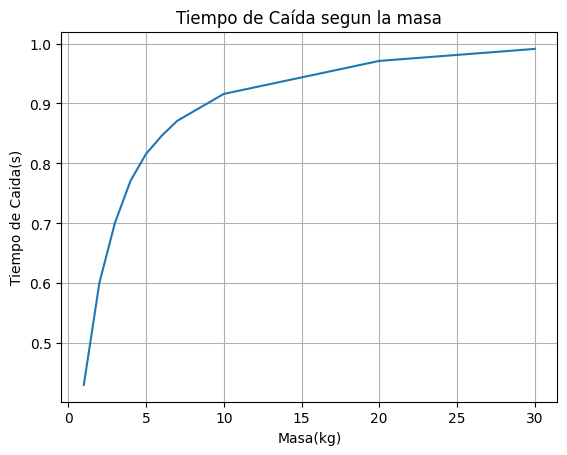

In [19]:
plt.plot(masas,tiempos)
plt.xlabel('Masa(kg)')
plt.ylabel('Tiempo de Caida(s)')
plt.title('Tiempo de Caída segun la masa')
plt.grid()
plt.show()

Punto 2

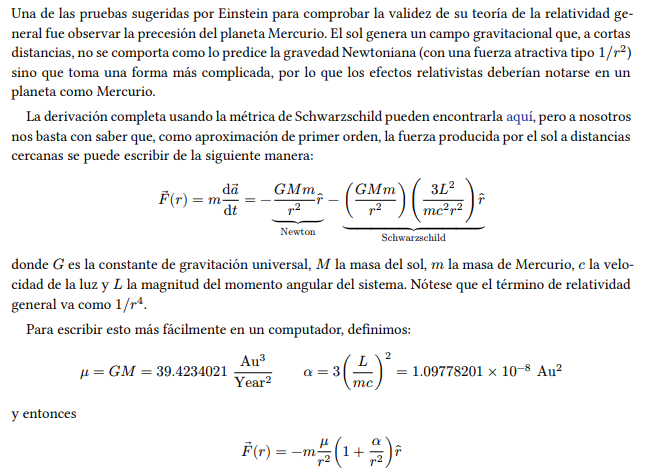

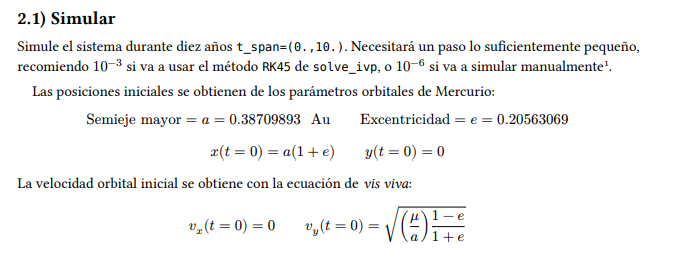

In [20]:
#constantes
u=39.4234021
alpha=1.09778201*10**(-8)
#condiciones iniciales
a=0.38709893
e=0.20563069
x_0=a*(1.+e)
y_0=0.
vx_0=0.
vy_0=np.sqrt((u/a)*((1-e)/(1+e)))

Planteando la simulacion

In [21]:
def simulacion(t,y):
    x,vx,y,vy=y
    r = np.sqrt(x**2 + y**2)
    f = -u / r**2 * (1 + alpha / r**2)
    ax = f * (x / r)
    ay = f * (y / r)
    return [vx, ax, vy, ay]
y0=[x_0,vx_0,y_0,vy_0]
t=np.linspace(0,10,10000)
solucion=solve_ivp(simulacion,t_span=(0,10),y0=y0,method="RK45",t_eval=t,rtol=1e-10, atol=1e-13)
solucion


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-03 ...  9.999e+00  1.000e+01]
        y: [[ 4.667e-01  4.666e-01 ... -3.057e-01 -3.067e-01]
            [ 0.000e+00 -1.810e-01 ... -1.218e+00 -8.038e-01]
            [ 0.000e+00  8.192e-03 ...  3.636e-02  2.398e-02]
            [ 8.192e+00  8.190e+00 ... -1.236e+01 -1.240e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 49646
     njev: 0
      nlu: 0

C:\Users\Thomas\AppData\Local\Temp\ipykernel_29716\3026125911.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0],[0],'ro',color='yellow',label="SOL")


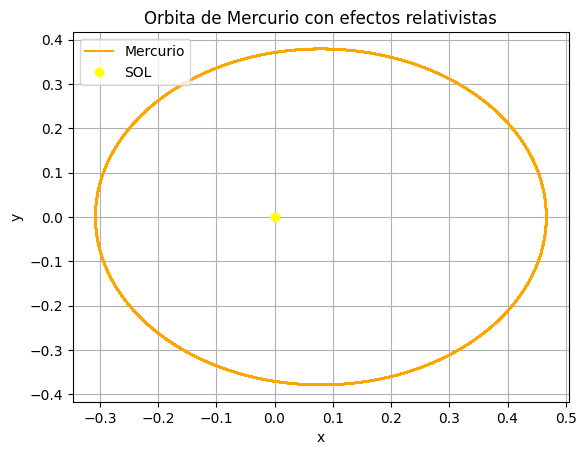

In [22]:
plt.plot(solucion.y[0],solucion.y[2],color="orange",label="Mercurio")
plt.plot([0],[0],'ro',color='yellow',label="SOL")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Orbita de Mercurio con efectos relativistas")
plt.legend(loc=2)
plt.grid()
plt.show()

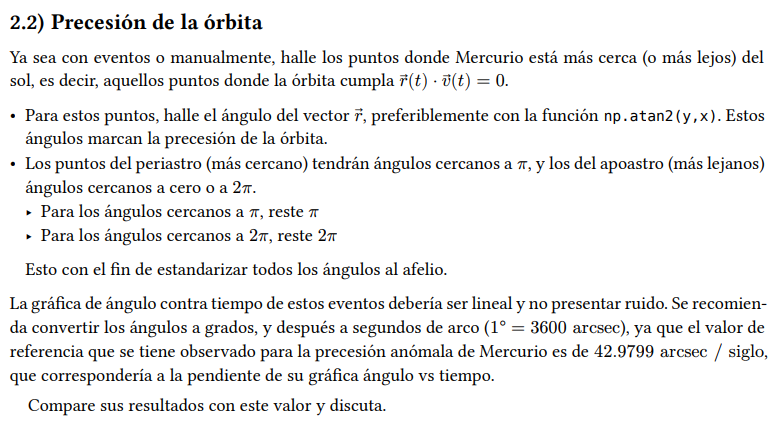

In [23]:
puntos_mas_cercanos_y_lejanos=[]
#buscaremos el punto con distancia minima
x=solucion.y[0]
y=solucion.y[2]
r=np.sqrt(x**2+y**2)
max_r=np.max(r)
min_r=np.min(r)
puntos_rmax=np.where(r==max_r) #para confirmar los datos del siguiente punto
#print(puntos_rmax)
puntos_rmin=np.where(r==min_r)
indice_max_rmin=puntos_rmin[0]+1
indice_min_rmin=puntos_rmin[0]-1

#solucion.y[0][indice_max_rmin]*solucion.y[1][indice_max_rmin]+solucion.y[2][indice_max_rmin]*solucion.y[3][indice_max_rmin]
#solucion.y[0][indice_min_rmin]*solucion.y[1][indice_min_rmin]+solucion.y[2][indice_min_rmin]*solucion.y[3][indice_min_rmin]

promedio_x=(x[indice_max_rmin]+x[indice_min_rmin])/2
promedio_y=(y[indice_max_rmin]+y[indice_min_rmin])/2
puntos_mas_cercanos_y_lejanos.append([float(promedio_x),float(promedio_y)])



In [24]:

for indice in range(0,len(solucion.y[0])):
    x=solucion.y[0][indice]
    y=solucion.y[2][indice]
    r=[x,y]
    v=[solucion.y[1][indice],solucion.y[3][indice]]
    if np.dot(r,v)== 0:
        puntos_mas_cercanos_y_lejanos.append(r)
#Solo encuentra el punto mas lejano
tiempos=[float(puntos_rmin[0]),float(puntos_rmax[0])]
puntos_mas_cercanos_y_lejanos



[[-0.3072910008879505, -1.2972007188312429e-05], [0.4666983500741617, 0.0]]

In [25]:
angulos=[]
angulos.append(3600*(np.rad2deg(np.arctan2(puntos_mas_cercanos_y_lejanos[0][1],puntos_mas_cercanos_y_lejanos[0][0])
               -np.pi)))
angulos.append(3600*(np.rad2deg(np.arctan2(puntos_mas_cercanos_y_lejanos[1][1],puntos_mas_cercanos_y_lejanos[1][0])-2*np.pi)))
np.polyfit(tiempos,angulos,1)

array([ 9.89913509e-04, -1.29600000e+06])

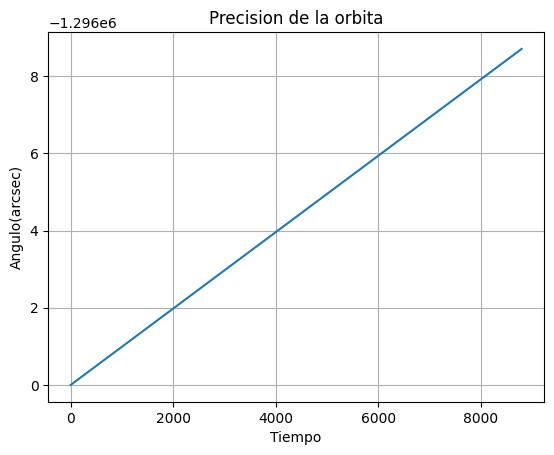

In [26]:
plt.plot(tiempos,angulos)
plt.xlabel("Tiempo")
plt.ylabel("Angulo(arcsec)")
plt.title("Precision de la orbita")
plt.grid()
plt.show()

Este valor de la pendiente 9.89913509e-04 arcseg/siglo difiere en una gran medida del valor esperado de 42.9799 arcseg/siglo. Esto implica que la solucion no tiene los parametros adecuados para realizar una simulacion precisa de esta orbita y se deberian tener en cuenta otros parametros adicionales.

3) Cuantizacion de la energia
\
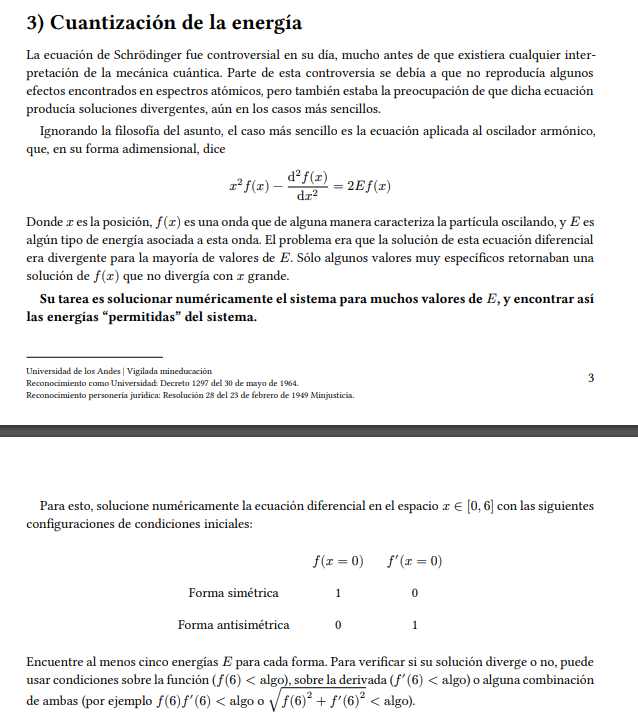

In [27]:
#condiciones
#Simetrica
x_0=0
f_0simetrico=1
df_0simetrico=0
y0_simetrico=[f_0simetrico,df_0simetrico]
#antisimetrica
x_0=0
f_0antisimetrico=0
df_0antisimetrico=1
y0_antisimetrico=[f_0antisimetrico,df_0antisimetrico]
#Valores de E a probar

E_valores=np.linspace(0,10.,10)

In [28]:
def modelo(x,y,E):
    f,df=y
    df_dx=df
    d2f_d2x=(x**2-2*E)*f
    return [df_dx,d2f_d2x]
t=[0,6]

Simetrico

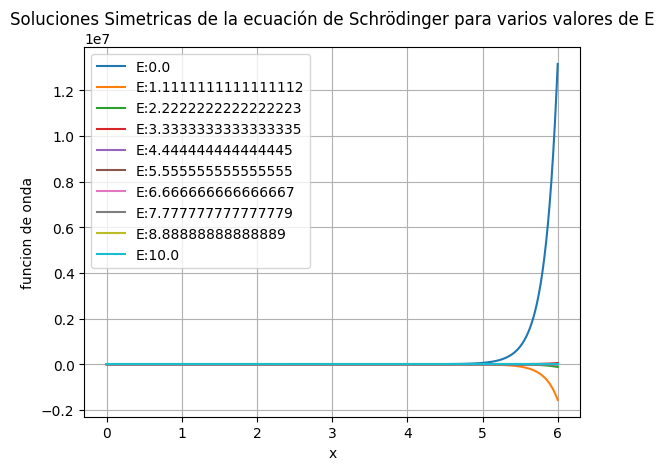

In [29]:
for E in E_valores:
    solucion=solve_ivp(modelo,t_span=t,y0=y0_simetrico,args=(E,),t_eval=np.linspace(0, 6, 1000))
    plt.plot(solucion.t,solucion.y[0],label='E:'+str(E))
plt.xlabel('x')
plt.ylabel('funcion de onda')
plt.title('Soluciones Simetricas de la ecuación de Schrödinger para varios valores de E')
plt.legend(loc=0)
plt.grid(True)
plt.show()

Antisimetrico

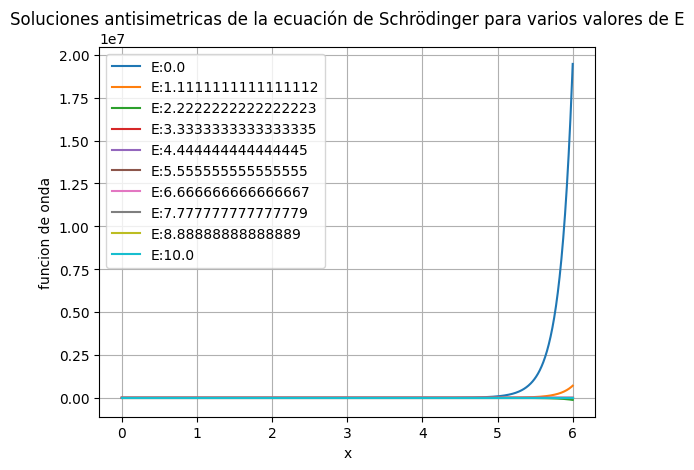

In [30]:
for E in E_valores:
    solucion=solve_ivp(modelo,t_span=t,y0=y0_antisimetrico,args=(E,),t_eval=np.linspace(0, 6, 1000))
    plt.plot(solucion.t,solucion.y[0],label='E:'+str(E))
plt.xlabel('x')
plt.ylabel('funcion de onda')
plt.title('Soluciones antisimetricas de la ecuación de Schrödinger para varios valores de E')
plt.legend(loc=0)
plt.grid(True)
plt.show()